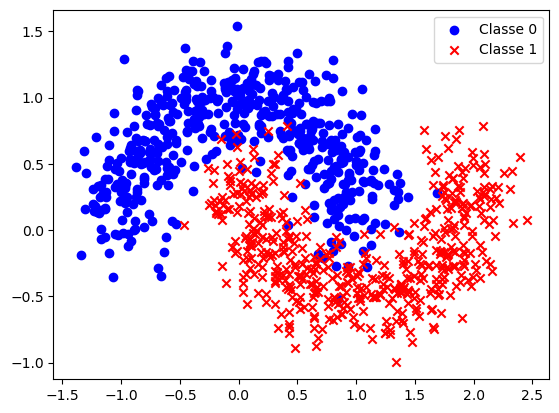

In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=0)

plt.scatter(X_moons[y_moons == 0][:, 0], X_moons[y_moons == 0][:, 1], c='b', marker='o', label='Classe 0')
plt.scatter(X_moons[y_moons == 1][:, 0], X_moons[y_moons == 1][:, 1], c='r', marker='x', label='Classe 1')
plt.legend()
plt.show()


# Créer le modèle

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)


In [9]:
# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Création du modèle de réseau de neurones
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [11]:
# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Entraînement du modèle
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 14ms/step - loss: 0.5812 - accuracy: 0.8025 - val_loss: 0.5218 - val_accuracy: 0.7900
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8687 - val_loss: 0.4287 - val_accuracy: 0.8050
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3117 - accuracy: 0.8838 - val_loss: 0.3985 - val_accuracy: 0.8000
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.8875 - val_loss: 0.3968 - val_accuracy: 0.8000
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2588 - accuracy: 0.8850 - val_loss: 0.3909 - val_accuracy: 0.8000
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2505 - accuracy: 0.8875 - val_loss: 0.3824 - val_accuracy: 0.8100
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2432 - accuracy: 0.8900 - val_loss: 0.3751 - val_accuracy: 0.8100
Epoch 8/50
25/25 [=

In [13]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 95.00%


31250/31250 [==============================] - 48s 2ms/step


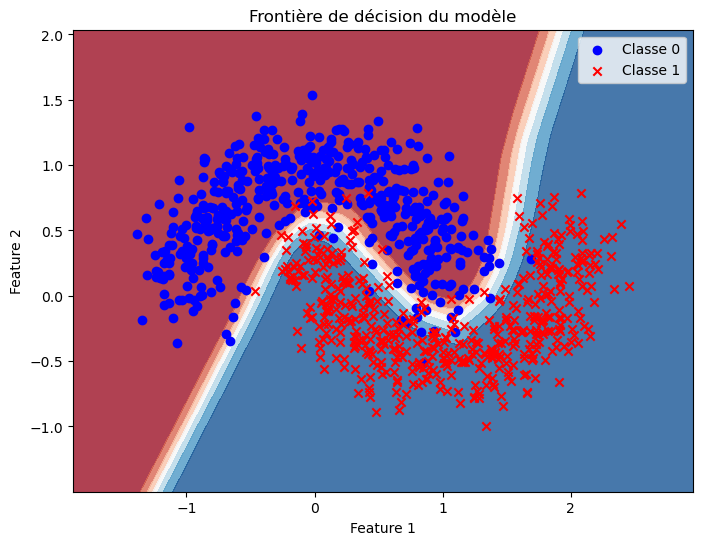

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Générer une grille de points plus fine pour l'espace des données
x_min, x_max = X_moons[:, 0].min() - 0.5, X_moons[:, 0].max() + 0.5
y_min, y_max = X_moons[:, 1].min() - 0.5, X_moons[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
grid = np.c_[xx.ravel(), yy.ravel()]

# Mise à l'échelle de la grille
grid_scaled = scaler.transform(grid)

# Prédiction des classes pour chaque point de la grille
predictions = model.predict(grid_scaled)
predictions = predictions.reshape(xx.shape)

# Tracer la frontière de décision et les points de données
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_moons[y_moons == 0][:, 0], X_moons[y_moons == 0][:, 1], c='b', marker='o', label='Classe 0')
plt.scatter(X_moons[y_moons == 1][:, 0], X_moons[y_moons == 1][:, 1], c='r', marker='x', label='Classe 1')
plt.legend()
plt.title('Frontière de décision du modèle')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
